# ML_PLATFORM DEMO PLOT

In [7]:
from influx import Influx
from dateutil import parser as dparser

# Use the following dataframe to draw plots
df = Influx().addFields(
        ["HT_PI_2180.PV", "HT_LI_2180.PV", "HT_PDI_2180.PV"]
).setStart(
    dparser.isoparse("2023-02-05T00:00:00+07:00")
).setStop(
    dparser.isoparse("2023-02-06T00:00:00+07:00")
).setRate("5s").asDataFrame()
df

,result,table,_start,_stop,_time,_value,_field,_measurement
0,_result,0,2023-02-05 00:00:05+07:00,2023-02-05 00:00:05+07:00,2023-02-05 00:00:05+07:00,32.025000,HT_PDI_2180.PV,phdpeer
1,_result,0,2023-02-05 00:00:10+07:00,2023-02-05 00:00:10+07:00,2023-02-05 00:00:10+07:00,31.803333,HT_PDI_2180.PV,phdpeer
2,_result,0,2023-02-05 00:00:15+07:00,2023-02-05 00:00:15+07:00,2023-02-05 00:00:15+07:00,31.705000,HT_PDI_2180.PV,phdpeer
3,_result,0,2023-02-05 00:00:20+07:00,2023-02-05 00:00:20+07:00,2023-02-05 00:00:20+07:00,31.840000,HT_PDI_2180.PV,phdpeer
4,_result,0,2023-02-05 00:00:25+07:00,2023-02-05 00:00:25+07:00,2023-02-05 00:00:25+07:00,31.790000,HT_PDI_2180.PV,phdpeer
...,...,...,...,...,...,...,...,...
31544,_result,1,2023-02-05 23:59:35+07:00,2023-02-05 23:59:35+07:00,2023-02-05 23:59:35+07:00,18.583000,HT_PI_2180.PV,phdpeer
31545,_result,1,2023-02-05 23:59:45+07:00,2023-02-05 23:59:45+07:00,2023-02-05 23:59:45+07:00,18.576000,HT_PI_2180.PV,phdpeer
31546,_result,1,2023-02-05 23:59:50+07:00,2023-02-05 23:59:50+07:00,2023-02-05 23:59:50+07:00,18.581500,HT_PI_2180.PV,phdpeer
31547,_result,1,2023-02-05 23:59:55+07:00,2023-02-05 23:59:55+07:00,2023-02-05 23:59:55+07:00,18.581500,HT_PI_2180.PV,phdpeer


In [8]:
# import plotly.express library
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Line chart

#### A. Plotly

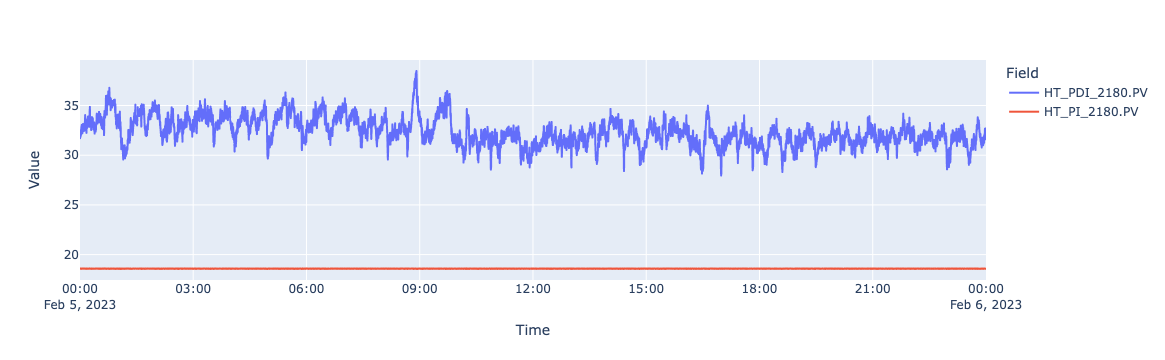

In [9]:
px.line(
    df, x="_time", y="_value", 
    line_group=df["_field"], 
    color=df["_field"], 
    labels={"_time": "Time", "_value": "Value", "_field": "Field"}
)

#### B. Seaborn

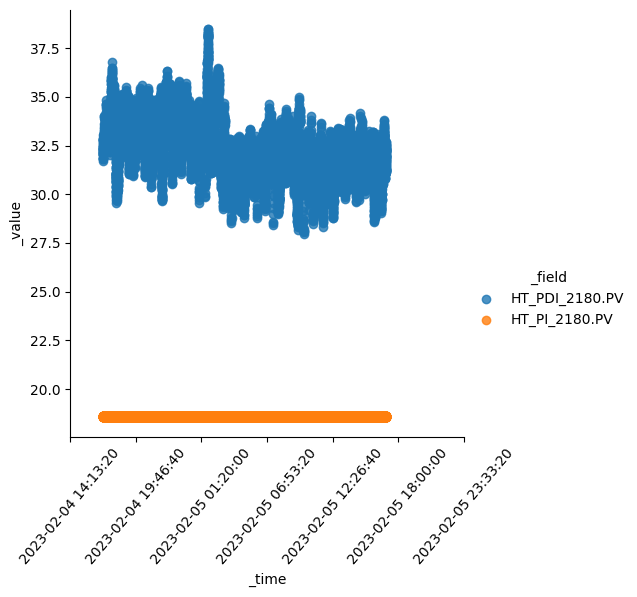

In [10]:
sea_data = df
sea_data["_time"] = sea_data["_time"].astype("int64")
sns.lmplot(x="_time", y="_value", data=sea_data, hue="_field", fit_reg=False)
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([pd.to_datetime(x).strftime("%Y-%m-%d %H:%M:%S") for x in xticks], rotation=50)
plt.show()

## 2. Bar chart

#### A. Plotly

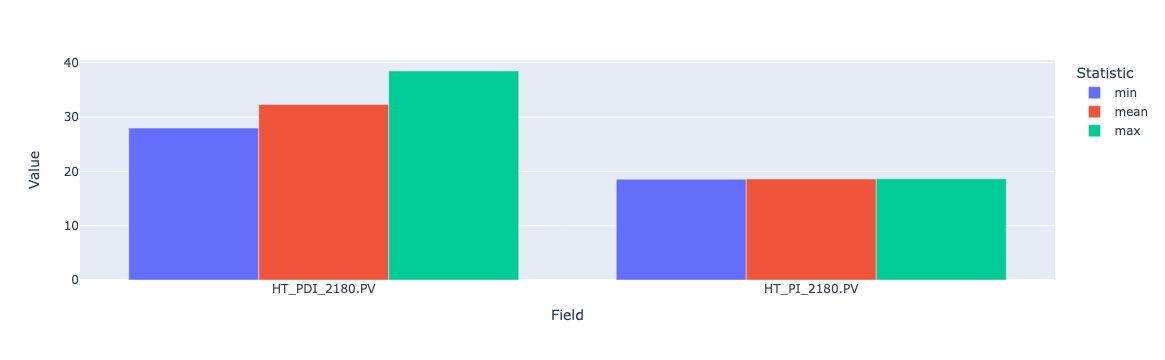

In [18]:
bar_df = df.groupby(["_field"]).agg({"_value": ["min", "mean","max"]}).reset_index()
data = bar_df["_value"]
data["_field"] = bar_df["_field"]
px.bar(data, x="_field", y=["min", "mean", "max"], barmode="group", labels={"_field": "Field", "value": "Value", "variable": "Statistic"})

#### B. Pyplot

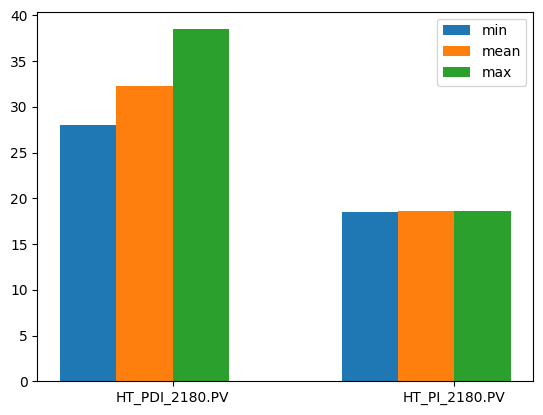

In [19]:
fields = bar_df["_field"].to_list()
min_values = bar_df["_value"]["min"].to_list()
mean_values = bar_df["_value"]["mean"].to_list()
max_values = bar_df["_value"]["max"].to_list()
fig, ax = plt.subplots()
x = range(len(fields))
rects1 = ax.bar(x, min_values, 0.2, label="min")
rects2 = ax.bar([i + 0.2 for i in x], mean_values, 0.2, label="mean")
rects3 = ax.bar([i + 0.4 for i in x], max_values, 0.2, label="max")
ax.set_xticks([i + 0.3 for i in x], fields)
ax.legend()
plt.show()

#### C. Seaborn

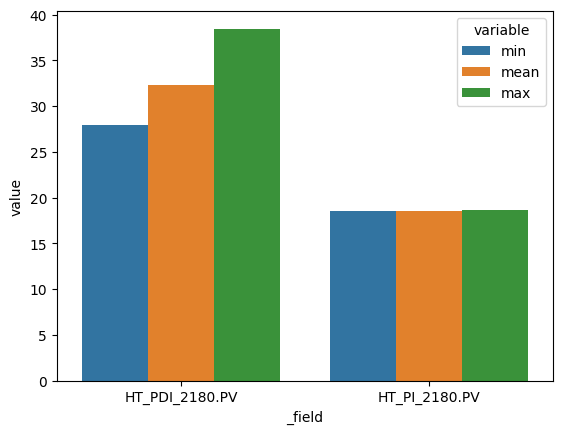

In [21]:
sea_bar_data = pd.melt(data, id_vars=["_field"], value_vars=["min", "mean", "max"])
sns.barplot(x="_field", y="value", hue="variable", data=sea_bar_data)
plt.show()

## Pie chart

#### A. Plotly

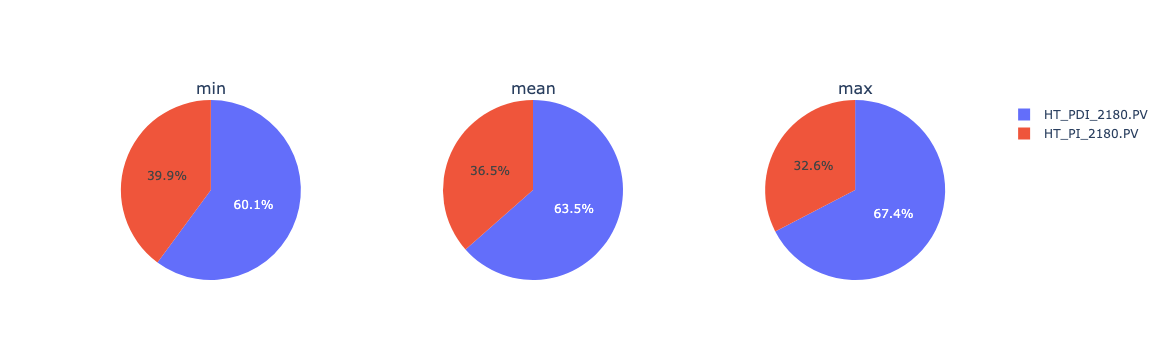

In [22]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]], subplot_titles=("min", "mean", "max"))

min = px.pie(data, values="min", names="_field", title="min")
mean = px.pie(data, values="mean", names="_field", title="mean")
max = px.pie(data, values="max", names="_field", title="max")

fig.add_trace(min.data[0], row=1, col=1)
fig.add_trace(mean.data[0], row=1, col=2)
fig.add_trace(max.data[0], row=1, col=3)

#### B. Pyplot + Seaborn

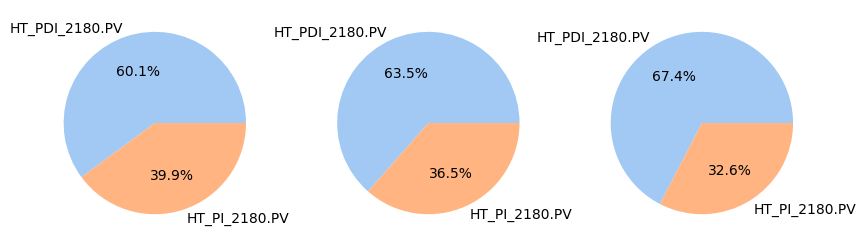

In [23]:
colors = sns.color_palette("pastel")[0:5]
new_fig = plt.figure(figsize=(10, 5))
min_pie = new_fig.add_subplot(1, 3, 1)
min_pie.pie(data["min"], labels=data["_field"], colors=colors, autopct="%1.1f%%")
mean_pie = new_fig.add_subplot(1, 3, 2)
mean_pie.pie(data["mean"], labels=data["_field"], colors=colors, autopct="%1.1f%%")
max_pie = new_fig.add_subplot(1, 3, 3)
max_pie.pie(data["max"], labels=data["_field"], colors=colors, autopct="%1.1f%%")
plt.show()